# Notebook 04 — GARCH Volatility Modeling on Spread Returns

**Adaptive Pair Trading Project**  
Ayush Arora (MQMS2404)

---

### Objective of this Notebook

This notebook models **conditional volatility** of the cointegrated spread using GARCH models.

Motivation:
- Spread is stationary in mean (Notebook 03)
- ARCH effects detected in spread returns (Notebook 03A)
- Therefore, volatility is time-varying and must be modeled explicitly

GARCH is applied **only to spread returns**, not price levels.

## Cell 1: Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model

## Cell 2: Load spread data from previous notebook

We load the spread constructed earlier and compute spread returns.

In [3]:
spread = pd.read_csv('data\spread_tatasteel_hindalco.csv', index_col=0, parse_dates=True).iloc[:,0]

# Spread returns (first difference)
spread_ret = spread.diff().dropna()

spread_ret.head()

Date
2015-01-02    0.075665
2015-01-05    1.162725
2015-01-06   -0.660292
2015-01-07    0.478281
2015-01-08   -0.396122
Name: 0, dtype: float64

## Cell 3: Visual inspection of spread returns

Volatility clustering can often be observed visually.

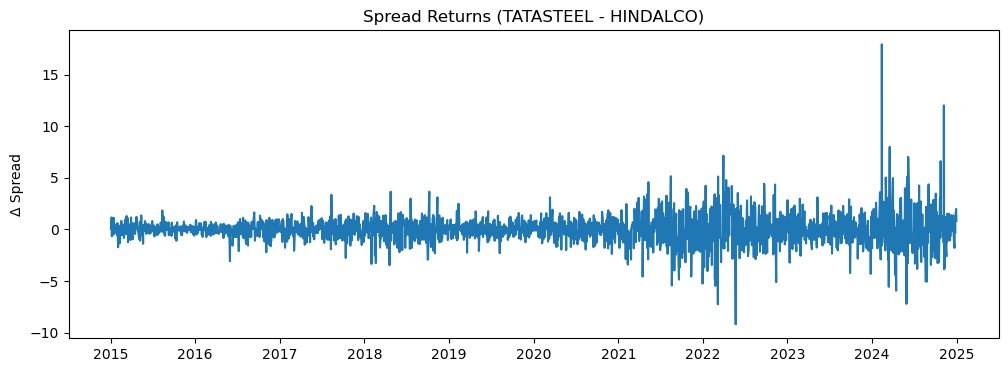

In [5]:
plt.figure(figsize=(12,4))
plt.plot(spread_ret)
plt.title('Spread Returns (TATASTEEL - HINDALCO)')
plt.ylabel('Δ Spread')
plt.show()

## Cell 4: Specify and fit GARCH(1,1) model

GARCH(1,1) is the standard baseline for financial volatility modeling.

In [6]:
garch_model = arch_model(
    spread_ret,
    mean='Zero',
    vol='GARCH',
    p=1,
    q=1,
    dist='normal'
)

garch_res = garch_model.fit(update_freq=10)
garch_res.summary()

Iteration:     10,   Func. Count:     48,   Neg. LLF: 3661.820432343402
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3661.819610079553
            Iterations: 14
            Function evaluations: 65
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                      0   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3661.82
Distribution:                  Normal   AIC:                           7329.64
Method:            Maximum Likelihood   BIC:                           7347.07
                                        No. Observations:                 2466
Date:                Fri, Jan 16 2026   Df Residuals:                     2466
Time:                        07:46:07   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      3.5108e-03  4.239e-03      0.828      0.408 [-4.797e-03,1.182e-02]
alpha[1]       0.0486  2.953e-02      1.646  9.978e-02   [-9.274e-03,  0.106]
beta[1]        0.9514  2.890e-02     32.921 1.086e-237      [  0.895,  1.008]
=============================================================================

Covariance estimator: robust
"""

## Cell 5: Extract conditional volatility estimates

The conditional variance represents time-varying risk.

In [7]:
cond_vol = garch_res.conditional_volatility

cond_vol.head()

Date
2015-01-02    0.643896
2015-01-05    0.631061
2015-01-06    0.669407
2015-01-07    0.671586
2015-01-08    0.666134
Name: cond_vol, dtype: float64

## Cell 6: Plot conditional volatility

This plot highlights volatility regimes over time.

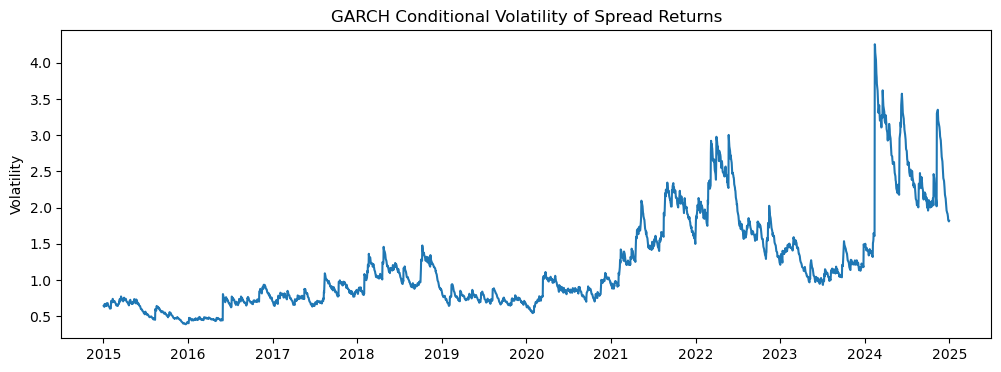

In [8]:
plt.figure(figsize=(12,4))
plt.plot(cond_vol)
plt.title('GARCH Conditional Volatility of Spread Returns')
plt.ylabel('Volatility')
plt.show()

## Cell 7: Save volatility series for downstream use

The estimated volatility will be used as a feature in ML models and for risk-aware trading.

In [9]:
vol_df = pd.DataFrame({'garch_vol': cond_vol})
vol_df.to_csv('data/garch_vol_tatsteel_hindalco.csv')

'Saved: data/garch_vol_tatasteel_hindalco.csv'

'Saved: data/garch_vol_tatasteel_hindalco.csv'

## Interpretation

- Spread returns exhibit strong volatility clustering
- GARCH successfully captures conditional variance dynamics
- Volatility series can be used for:
  - Position sizing
  - Regime detection
  - ML feature engineering

This completes volatility modeling for the selected pair.